# STEP #0: PROBLEM STATEMENT  


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning).
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent)






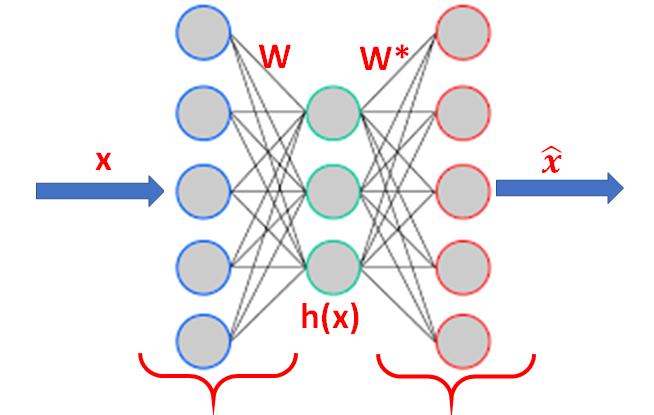

# STEP #1: IMPORT LIBRARIES

In [ ]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Uninstalling tensorflow-2.2.0rc2:
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 377.0MB 44kB/s 
     |████████████████████████████████| 3.2MB 32.5MB/s 
     |████████████████████████████████| 491kB 47.7MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow-gpu 2.0.0a0
    Uninstalling tensorflow-gpu-2.0.0a0:
      Successfully uninstalled tensorflow-gpu-2.0.0a0


In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 53kB/s 
     |████████████████████████████████| 419kB 36.2MB/s 
     |████████████████████████████████| 3.0MB 34.9MB/s 


In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

AttributeError: ignored

In [ ]:
tf.__version__

# STEP #2: LOAD DATASET

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

ImportError: ignored

# STEP #3: DATA VISUALIZATION

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image



In [ ]:
label = y_train[i]
label


In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #4: LET'S ADD SOME NOISE TO OUR DATASET!

In [ ]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Let's create some noise with the same dimensions as the original image (28,28)
added_noise = np.random.randn(*(28,28))

In [ ]:
added_noise.shape

In [ ]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

In [ ]:
plt.imshow(added_noise)

In [ ]:
# Let's take a sample image and add noise to it
noise_factor = 0.2
sample_image = X_train[101]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

In [ ]:
plt.imshow(noisy_sample_image, cmap="gray")

In [ ]:
noisy_sample_image.max()

In [ ]:
noisy_sample_image.min()

In [ ]:
# Let's clip the image to range from 0 to 1
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [ ]:
noisy_sample_image.max()

In [ ]:
noisy_sample_image.min()

In [ ]:
plt.imshow(noisy_sample_image, cmap="gray")

In [ ]:
# Let's do the same operation over all the images contained in the training dataset
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [ ]:
X_train_noisy # this is a list, let's convert it to array

In [ ]:
 # Convert from list to array
X_train_noisy = np.array(X_train_noisy)

In [ ]:
X_train_noisy.shape

In [ ]:
plt.imshow(X_train_noisy[22], cmap="gray")

In [ ]:
# Let's do the same operation for the testing dataset as well
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

In [ ]:
X_test_noisy.shape

In [ ]:
# Let's make sure that the test images are noisy as well!
plt.imshow(X_test_noisy[10], cmap = 'gray')

# STEP #5: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

# Encoded image (code layer)
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))

# Let's build the decoder CNN
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
# autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding="same"))


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

In [ ]:

autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
          X_train.reshape(-1, 28, 28, 1),
          epochs=10,
          batch_size=200)


# STEP #5: EVALUATE THE MODEL

In [ ]:
# Let's pick up 15 images and run them through the trained autoencoder
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

In [ ]:
denoised_images.shape

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')


# GREAT JOB!

# LET'S CONFIRM THE DIMENSIONS

Notes:


*   If stride = 1 and we use "same" padding, the output feature map dimension will be equal to the output dimensions. Example:
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
* If stride = 2 and we use "same" padding, the output feature map dimesions will be smaller (cut in half)
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))

* Padding = 'same' means that we would like to preserve the dimensions of the input so during the convolution process, zero padding will be added around the image
* padding = 'valid' means that we are ready to lose information so the only valid pixels are the ones present at the edges of the input image, ie: do not add any padding around the image



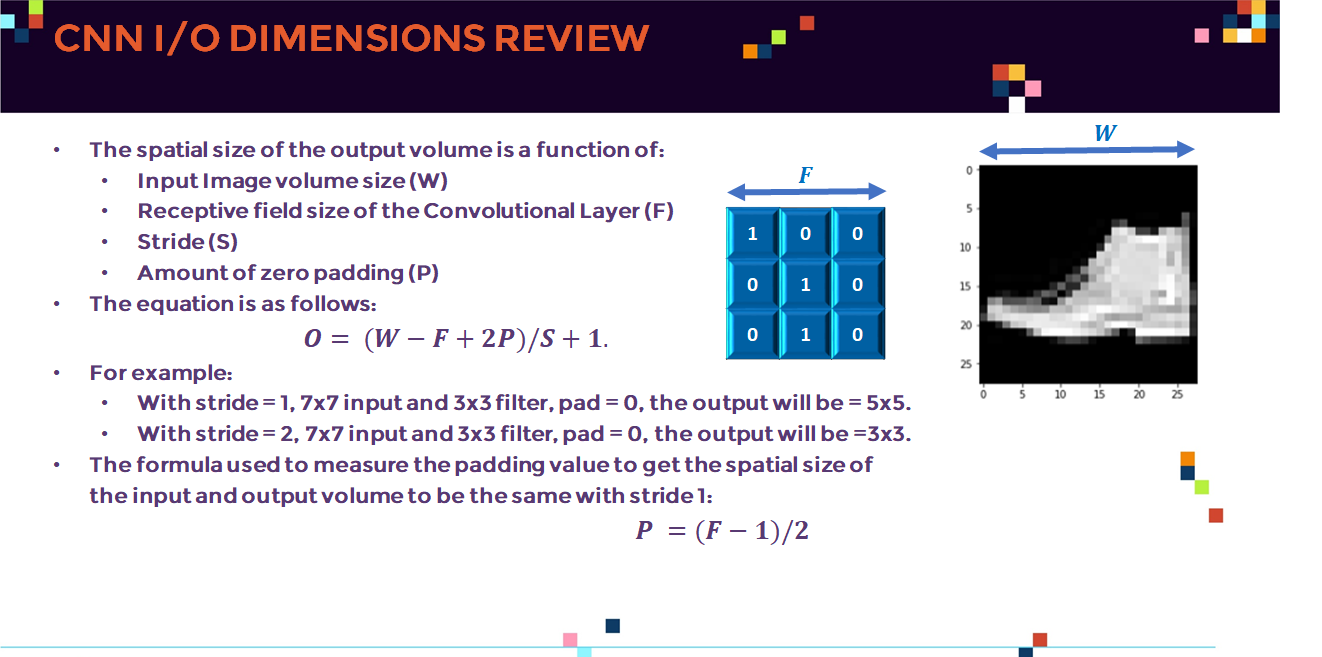

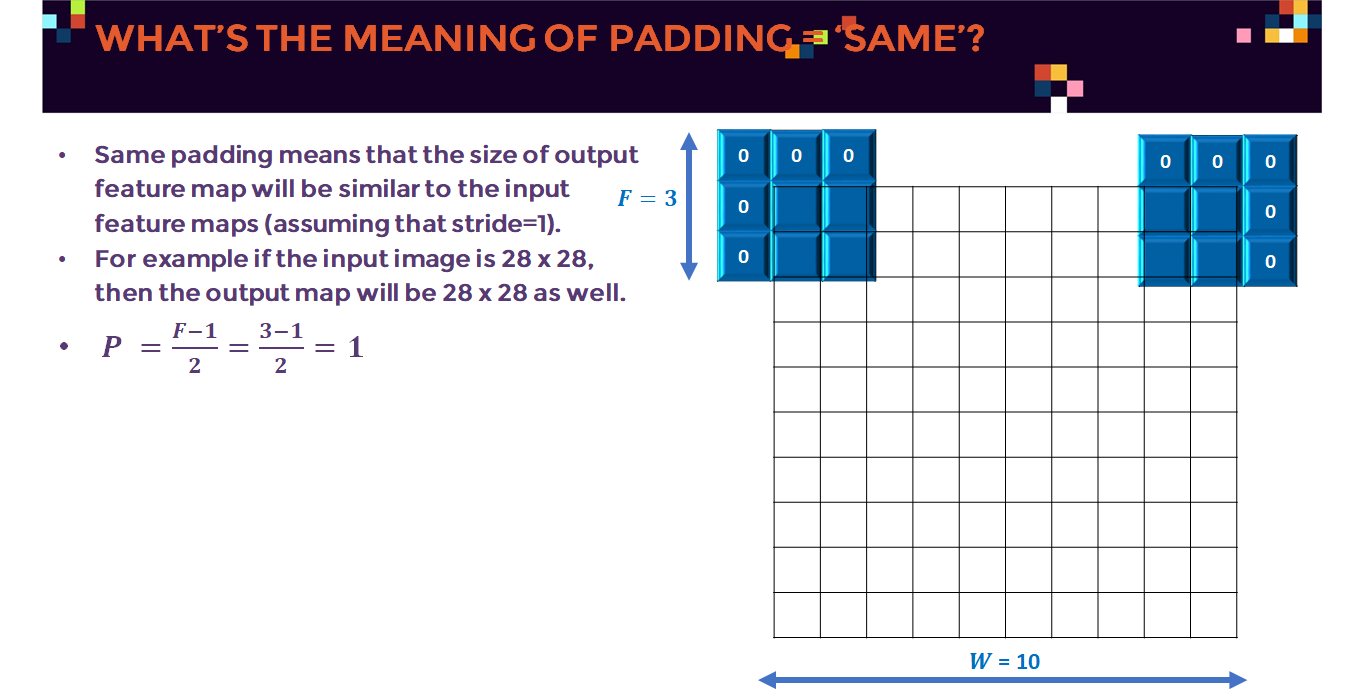

In [ ]:
# W = 28, F = 3, S = 1, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/1 + 1 = 28
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.summary()

In [ ]:
# W = 28, F = 3, S = 2, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/2 + 1 = 14
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.summary()

In [ ]:
# When padding = valid, we did not add any border (zero padding) around the input
# W = 28, F = 3, S = 1, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/1 + 1 = 26

autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="valid", input_shape=(28, 28, 1)))
autoencoder.summary()

In [ ]:
# When padding = valid, we did not add any border (zero padding) around the input
# W = 28, F = 3, S = 2, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/2 + 1 = 13

autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="valid", input_shape=(28, 28, 1)))
autoencoder.summary()